In [1]:
import pandas as pd
import numpy as np
from  sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import phenograph
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_dir = "/home/ucsd-train25/scratch/projects/atlas_full/processed_files/"

In [3]:
zscore_variable_genes = pd.read_csv(data_dir+"tpm_all_vg_0.05_zscores.csv", index_col=0)
print(zscore_variable_genes.shape)
zscore_variable_genes.head()

(4067, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
4732440D04Rik,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,...,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306
Mcmdc2,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,...,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894
Cspp1,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,...,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,0.655883
Prdm14,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,...,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827
Trpa1,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,...,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380


## PCA

Before clustering, we can use PCA to reduce the data into fewer dimensions that capture all (the majority) of the variation in the dataset. This will help increase the speed of downstream clustering and visualization without losing any information.

In [4]:
#Initiate a PCA object to be calculated with 200 components. 
pca = PCA(n_components=200)

#Fit our data with this PCA and save the result. PCA requires the samples (cells) to be the rows of the dataframe and 
#the measurements (genes) to be the columns. So we are going to transpose our dataframe with .T
pca_result = pca.fit_transform(zscore_variable_genes.T)

In [5]:
#The explained variance ratio will tell you how much of the variation in the dataset was captured by each component. 
#Notice there are 200 values in this array, that is because we kept 200 components.

pca.explained_variance_ratio_

array([0.01806827, 0.01151089, 0.00901044, 0.00866255, 0.00566567,
       0.00440534, 0.00416421, 0.00390273, 0.00345033, 0.0033248 ,
       0.00319278, 0.00300472, 0.00279894, 0.00251489, 0.0024628 ,
       0.0023803 , 0.00234923, 0.00226868, 0.00221704, 0.00221097,
       0.00216154, 0.00207857, 0.00204516, 0.00203255, 0.00194606,
       0.00191095, 0.00184907, 0.00177076, 0.00174304, 0.0017282 ,
       0.00171043, 0.00169454, 0.00167724, 0.00163897, 0.00162498,
       0.00161825, 0.00159679, 0.00157514, 0.00156343, 0.00155103,
       0.00152253, 0.00151837, 0.00151114, 0.00149695, 0.0014672 ,
       0.00145746, 0.00144584, 0.00143209, 0.00142787, 0.00141311,
       0.00139158, 0.00138742, 0.00137963, 0.00136556, 0.00134932,
       0.00134532, 0.00133365, 0.00132564, 0.00131817, 0.00131397,
       0.00130532, 0.00129539, 0.00129218, 0.00127815, 0.00126655,
       0.001266  , 0.00126043, 0.00124997, 0.00123991, 0.00123828,
       0.00122716, 0.00122244, 0.00121316, 0.00120849, 0.00119

In [6]:
#Lets look at the cumulative sum to see how many components we need to reach 100% (ish) of the variation captured#Lets lo 

np.cumsum(pca.explained_variance_ratio_)

array([0.01806827, 0.02957916, 0.0385896 , 0.04725215, 0.05291782,
       0.05732317, 0.06148737, 0.0653901 , 0.06884043, 0.07216523,
       0.07535802, 0.07836274, 0.08116168, 0.08367656, 0.08613936,
       0.08851966, 0.09086889, 0.09313757, 0.09535461, 0.09756558,
       0.09972712, 0.10180569, 0.10385085, 0.1058834 , 0.10782946,
       0.10974041, 0.11158948, 0.11336024, 0.11510329, 0.11683149,
       0.11854192, 0.12023646, 0.1219137 , 0.12355267, 0.12517765,
       0.12679589, 0.12839268, 0.12996782, 0.13153125, 0.13308228,
       0.13460481, 0.13612318, 0.13763432, 0.13913127, 0.14059847,
       0.14205593, 0.14350177, 0.14493386, 0.14636173, 0.14777484,
       0.14916642, 0.15055384, 0.15193347, 0.15329902, 0.15464835,
       0.15599367, 0.15732732, 0.15865296, 0.15997113, 0.1612851 ,
       0.16259042, 0.1638858 , 0.16517798, 0.16645613, 0.16772268,
       0.16898869, 0.17024911, 0.17149908, 0.172739  , 0.17397728,
       0.17520444, 0.17642688, 0.17764005, 0.17884854, 0.18004

Text(0,0.5,'cumulative explained variance')

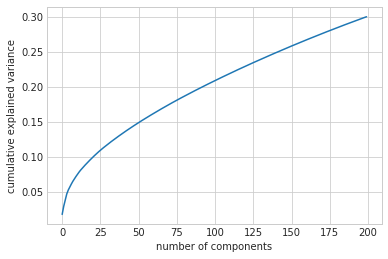

In [7]:
sns.set_style("whitegrid")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [8]:
pca_df = pd.DataFrame(pca_result)
pca_df.index = zscore_variable_genes.columns
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,-0.132621,-1.465811,9.800459,-0.971940,2.114937,-3.085438,-5.103847,-0.131902,0.310019,-2.854038,...,-0.088826,-0.532709,-0.017715,0.139698,0.609134,0.176982,0.017013,-0.354740,0.305332,0.170955
B1_AAACCGTGCCAAGT_Tuft,-7.711044,2.864433,14.090662,5.553612,-1.949899,1.840452,1.623986,-0.738347,1.689750,1.917765,...,0.678826,1.674667,2.188692,-0.896791,-1.189892,-1.108182,1.709061,2.857266,0.712513,0.165707
B1_AAACGCACAGCCTA_Goblet,-5.170977,4.687729,10.088000,-0.468681,16.833818,0.854971,5.750788,-5.051341,-1.952314,1.234242,...,1.453562,0.322072,-0.672145,-0.031125,0.052823,-0.171979,0.195672,-0.007241,-0.373622,-0.240598
B1_AAACGCACCAGATC_Endocrine,-4.732976,8.980451,11.981695,-3.907568,-2.071578,-1.617608,-0.787370,-0.930882,1.844991,-1.942296,...,-0.212283,0.648584,-0.668319,0.220336,0.126091,-0.126328,0.397798,0.228752,0.599377,0.028001
B1_AAACGCACCGCCTT_Stem,-7.555880,-1.749496,15.332018,-1.848481,-1.351471,0.771525,1.546526,-2.059437,-1.252739,-0.330156,...,1.023127,0.582367,-0.131589,-0.776203,-0.346239,-0.399548,-0.788534,-0.093179,0.232017,0.899570


## Plotting first two components of PCA

In [81]:
subset_PCA = pca_df[[0, 1]]
subset_PCA.rename(columns = {0:'x', 1:'y'}, inplace=True)

/home/ucsd-train25/anaconda2/envs/py3_cshl/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


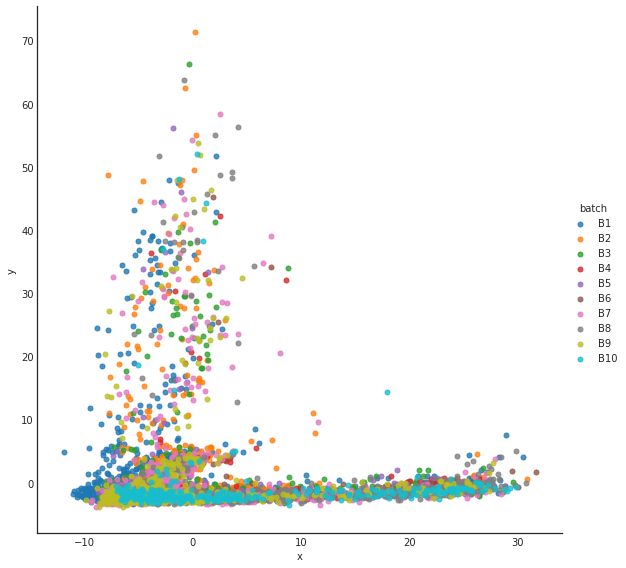

In [82]:
subset_PCA = subset_PCA.reset_index()

subset_PCA['batch'] = subset_PCA['index'].apply(lambda x: x.split("_")[0])

subset_PCA.set_index('index', inplace=True, drop=True)

sns.set_style('white')

g = sns.lmplot('x', 'y', subset_PCA, hue='batch', fit_reg=False, 
              scatter_kws={"s":25}, size=8)


## Phenograph

Paper explaining the method is [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4508757/)

In [64]:
num_PCA_components_to_keep = 20

cols = list(range(num_PCA_components_to_keep))
subset = pca_df[cols]
print(subset.shape)
subset.head()

(7216, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,-0.132621,-1.465811,9.800459,-0.971940,2.114937,-3.085438,-5.103847,-0.131902,0.310019,-2.854038,1.314458,4.096412,0.341867,-0.358269,-0.295230,0.609654,-0.462344,0.179909,0.382957,0.789038
B1_AAACCGTGCCAAGT_Tuft,-7.711044,2.864433,14.090662,5.553612,-1.949899,1.840452,1.623986,-0.738347,1.689750,1.917765,-0.777996,-1.492914,-0.841584,-0.025703,-0.856406,2.898511,-0.107867,-0.994364,-1.265051,1.521963
B1_AAACGCACAGCCTA_Goblet,-5.170977,4.687729,10.088000,-0.468681,16.833818,0.854971,5.750788,-5.051341,-1.952314,1.234242,1.323141,-2.793013,0.238205,0.416627,-0.422605,0.591544,-0.069183,-0.726958,-0.458237,0.420440
B1_AAACGCACCAGATC_Endocrine,-4.732976,8.980451,11.981695,-3.907568,-2.071578,-1.617608,-0.787370,-0.930882,1.844991,-1.942296,1.986454,1.162861,-1.566045,0.319124,-1.153056,2.651283,2.419014,0.636495,-0.233353,1.987112
B1_AAACGCACCGCCTT_Stem,-7.555880,-1.749496,15.332018,-1.848481,-1.351471,0.771525,1.546526,-2.059437,-1.252739,-0.330156,-0.121525,1.549372,0.440034,-0.040089,0.206134,0.421659,-0.697862,0.576886,0.188195,-0.094689


In [65]:
communities_500, sparse_matrix500, Q500 = phenograph.cluster(subset, k=500)

Finding 500 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.9789767265319824 seconds
Jaccard graph constructed in 123.79527759552002 seconds
Wrote graph to binary file in 8.060910701751709 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.742375
Louvain completed 21 runs in 20.808039665222168 seconds
PhenoGraph complete in 155.65909099578857 seconds


In [66]:
communities_300, sparse_matrix300, Q300 = phenograph.cluster(subset, k=300)

Finding 300 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.008049726486206 seconds
Jaccard graph constructed in 42.935999155044556 seconds
Wrote graph to binary file in 4.744572639465332 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.772807
After 3 runs, maximum modularity is Q = 0.775535
Louvain completed 23 runs in 18.145984411239624 seconds
PhenoGraph complete in 68.12107563018799 seconds


In [67]:
communities_100, sparse_matrix100, Q100 = phenograph.cluster(subset, k=100)

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.6439332962036133 seconds
Jaccard graph constructed in 7.113163948059082 seconds
Wrote graph to binary file in 1.617304801940918 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.828999
Louvain completed 21 runs in 8.13323426246643 seconds
PhenoGraph complete in 18.593399047851562 seconds


## TSNE

Talk from the creator of the algorithm is [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw).

Explanation from the math perspective is [here](http://jotterbach.github.io/presentations/TSNE_KL-divergence/#/title).

In [68]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, 
            n_iter=1000, learning_rate = 150)
tsne_pca = tsne.fit_transform(subset)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7216 samples in 0.016s...
[t-SNE] Computed neighbors for 7216 samples in 2.338s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7216
[t-SNE] Computed conditional probabilities for sample 2000 / 7216
[t-SNE] Computed conditional probabilities for sample 3000 / 7216
[t-SNE] Computed conditional probabilities for sample 4000 / 7216
[t-SNE] Computed conditional probabilities for sample 5000 / 7216
[t-SNE] Computed conditional probabilities for sample 6000 / 7216
[t-SNE] Computed conditional probabilities for sample 7000 / 7216
[t-SNE] Computed conditional probabilities for sample 7216 / 7216
[t-SNE] Mean sigma: 1.471760
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.540932
[t-SNE] Error after 1000 iterations: 1.122083


In [69]:
df_tsne_pca = pd.DataFrame(tsne_pca, index = subset.index)
df_tsne_pca.rename(columns = {0:'x',1:'y'}, inplace=True)
df_tsne_pca['community_500'] = communities_500
df_tsne_pca['community_300'] = communities_300
df_tsne_pca['community_100'] = communities_100

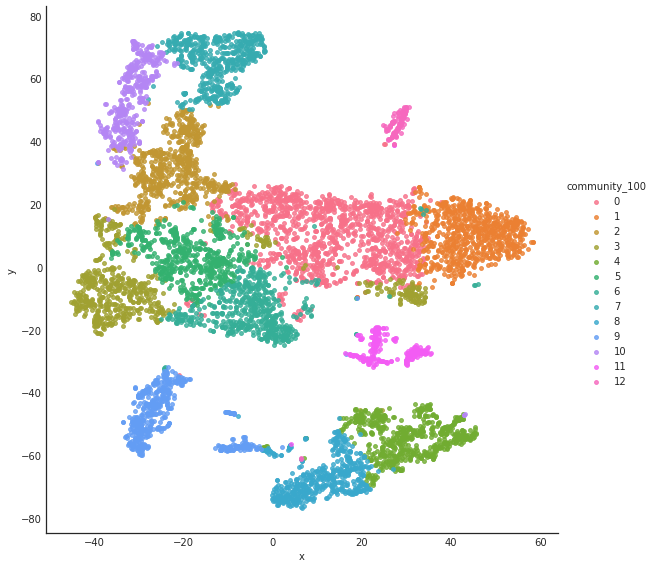

In [70]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='community_100', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

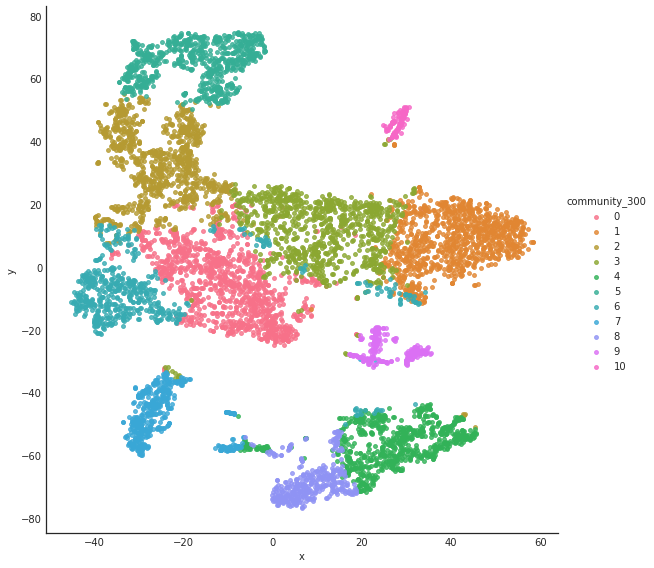

In [71]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='community_300', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

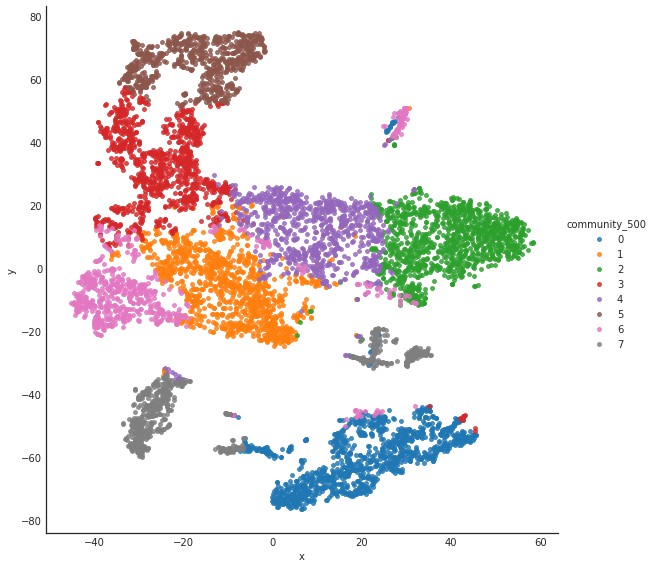

In [72]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='community_500', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

In [73]:
temp = df_tsne_pca.reset_index()
temp['batch'] = temp['index'].apply(lambda x: x.split("_")[0])
temp['celltype'] = temp['index'].apply(lambda x: x.split("_")[2])
temp.head()

,index,x,y,community_500,community_300,community_100,batch,celltype
0,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,39.302769,-50.858334,0,4,4,B1,Enterocyte.Immature.Distal
1,B1_AAACCGTGCCAAGT_Tuft,6.580037,-61.769756,0,8,8,B1,Tuft
2,B1_AAACGCACAGCCTA_Goblet,-8.786306,-58.158936,7,7,9,B1,Goblet
3,B1_AAACGCACCAGATC_Endocrine,7.341705,-54.548725,0,4,4,B1,Endocrine
4,B1_AAACGCACCGCCTT_Stem,10.150571,-67.295891,0,8,8,B1,Stem


In [74]:
df_tsne_pca = temp.set_index('index', drop=True)
df_tsne_pca.head()

,x,y,community_500,community_300,community_100,batch,celltype
index,,,,,,,
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,39.302769,-50.858334,0,4,4,B1,Enterocyte.Immature.Distal
B1_AAACCGTGCCAAGT_Tuft,6.580037,-61.769756,0,8,8,B1,Tuft
B1_AAACGCACAGCCTA_Goblet,-8.786306,-58.158936,7,7,9,B1,Goblet
B1_AAACGCACCAGATC_Endocrine,7.341705,-54.548725,0,4,4,B1,Endocrine
B1_AAACGCACCGCCTT_Stem,10.150571,-67.295891,0,8,8,B1,Stem


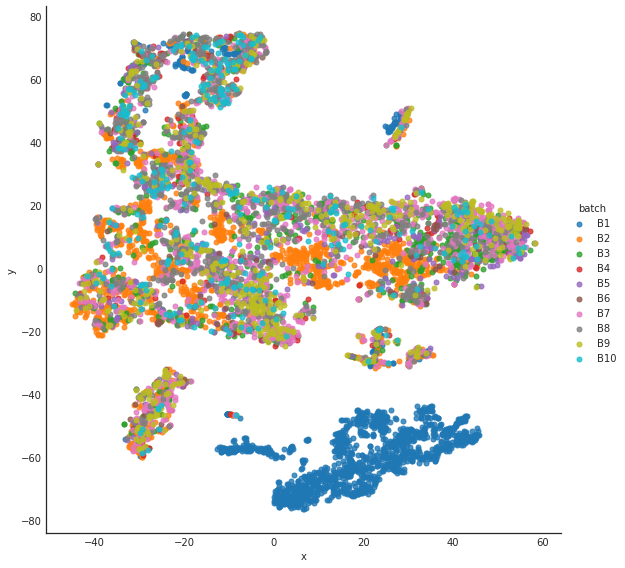

In [75]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='batch', fit_reg=False, 
              scatter_kws={"s":25}, size=8)

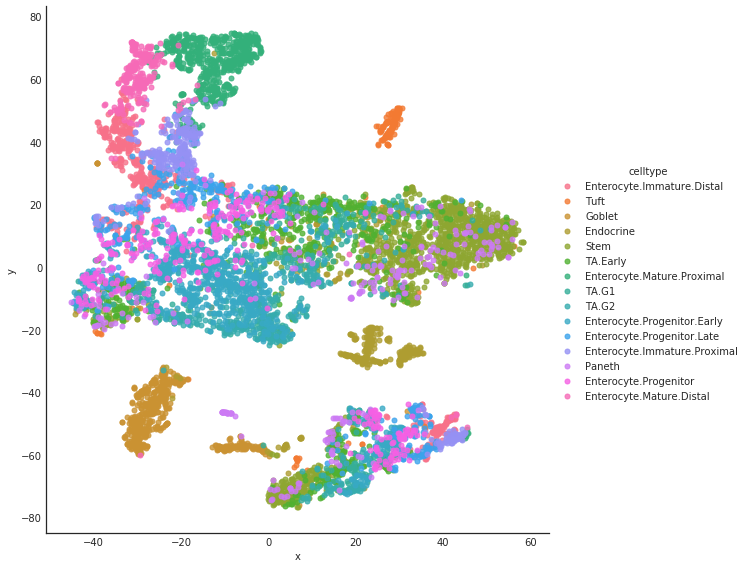

In [76]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='celltype', fit_reg=False, 
              scatter_kws={"s":25}, size=8)

## Save TSNE dataframe

Save the file with a name that corresponds to the parameters used to generate it

In [84]:
#df_tsne_pca.to_csv(data_dir+"tpm_all_vg_0.05_zscores_pca20_tSNEdf.csv")